# Poisson(7) in Theory and Practice — PMF, CDF, Simulation, and Extras

We'll build intuition for PMF/CDF with Poisson(7), simulate a year of defects, connect to Exponential waiting times, and do a tiny Bayesian update.


In [8]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#1e1e1e'
plt.rcParams['axes.facecolor'] = '#2d2d2d'
plt.rcParams['axes.edgecolor'] = '#444444'
plt.rcParams['axes.labelcolor'] = '#e0e0e0'
plt.rcParams['xtick.color'] = '#b0b0b0'
plt.rcParams['ytick.color'] = '#b0b0b0'
plt.rcParams['text.color'] = '#e0e0e0'
plt.rcParams['grid.color'] = '#404040'
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 11
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

np.set_printoptions(precision=3, suppress=True)

print("Setup complete! Dark mode styling activated.")


Setup complete! Dark mode styling activated.


## Part 1: Distribution in Theory

We start with **Poisson(λ=7)**. 
- **PMF** gives P(X=k) — the probability of exactly k defects
- **CDF** gives P(X≤k) — the probability of at most k defects

**Tasks 1–4**: Set λ; compute P(X=7), P(X≤4), P(X>9); then plot PMF and CDF.


In [13]:
# TODO (Task 1): Set lambda (rate parameter)
lam = 7

# TODO (Task 2): Compute P(X = lam) using PMF
# Hint: st.poisson.pmf(k, mu=lam) gives P(X=k)
p_eq_lam = st.poisson.pmf(lam, mu=lam)
print(p_eq_lam)

# TODO (Task 3): Compute P(X <= 4) using CDF
# Hint: st.poisson.cdf(k, mu=lam) gives P(X<=k)
p_le_4 = st.poisson.cdf(4, mu=lam)
print(p_le_4)
# TODO (Task 4): Compute P(X > 9) using complement rule
# Hint: P(X > 9) = 1 - P(X <= 9)
p_gt_9 = 1 - st.poisson.cdf(9, mu=lam)
print(p_gt_9)
# Print results
print(f"P(X={lam}) = {p_eq_lam:.4f}")
print(f"P(X<=4) = {p_le_4:.4f}")
print(f"P(X>9) = {p_gt_9:.4f}")


0.14900277967433773
0.17299160788207144
0.16950406276132668
P(X=7) = 0.1490
P(X<=4) = 0.1730
P(X>9) = 0.1695


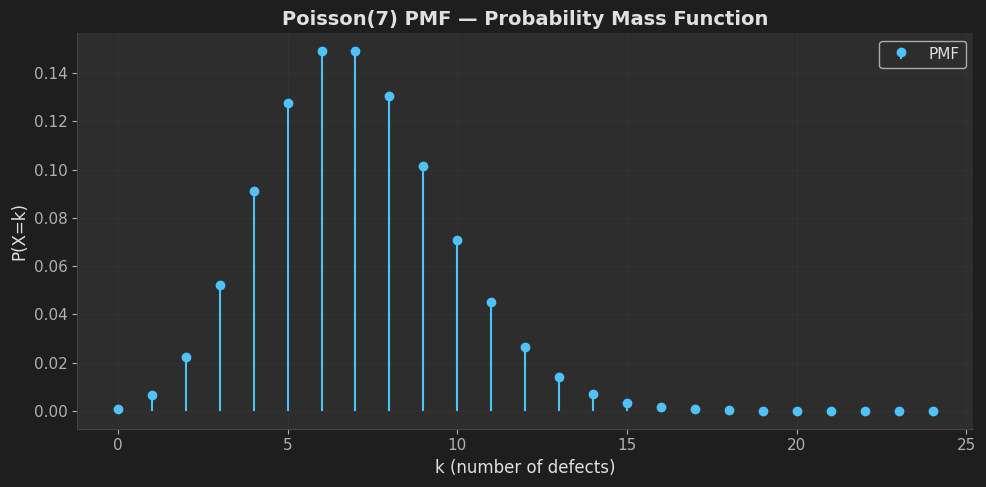

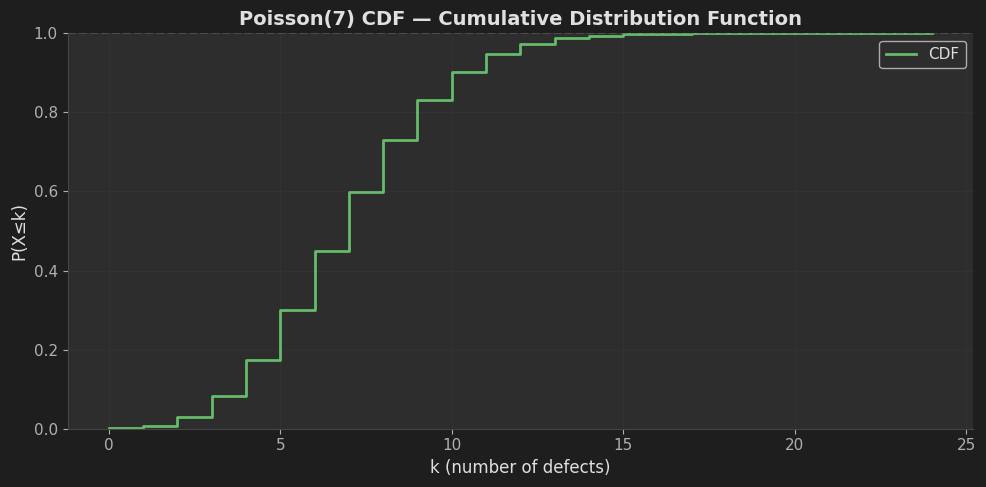

In [15]:
# TODO: Compute arrays for k = 0 to 24
k = np.arange(0, 25)
pmf = st.poisson.pmf(k, mu=lam)
cdf = st.poisson.cdf(k, mu=lam)

import os

# Ensure the output directory exists
output_dir = "../images"
os.makedirs(output_dir, exist_ok=True)

# TODO: Create PMF plot (lollipop/stem plot)
fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(k, pmf, basefmt=" ", linefmt='#4fc3f7', markerfmt='o', label='PMF')
ax.set_title('Poisson(7) PMF — Probability Mass Function', fontsize=14, fontweight='bold')
ax.set_xlabel('k (number of defects)', fontsize=12)
ax.set_ylabel('P(X=k)', fontsize=12)
ax.legend()
plt.tight_layout()
pmf_fig_path = os.path.join(output_dir, "poisson7_pmf.png")
fig.savefig(pmf_fig_path)
plt.show()

# TODO: Create CDF plot (step function)
fig, ax = plt.subplots(figsize=(10, 5))
ax.step(k, cdf, where='post', linewidth=2, color='#66bb6a', label='CDF')
ax.set_title('Poisson(7) CDF — Cumulative Distribution Function', fontsize=14, fontweight='bold')
ax.set_xlabel('k (number of defects)', fontsize=12)
ax.set_ylabel('P(X≤k)', fontsize=12)
ax.set_ylim(0, 1)
ax.axhline(y=1, color='#666', linestyle='--', alpha=0.5)
ax.legend()
plt.tight_layout()
cdf_fig_path = os.path.join(output_dir, "poisson7_cdf.png")
fig.savefig(cdf_fig_path)
plt.show()


## Part 2: Distribution in Practice

Simulate a **year of defects** (365 days). Compare empirical totals/means with theory (λ=7, expected total = 7×365).

Find the maximum day and its Poisson tail probability P(X≥max).


In [20]:
# TODO (Task 5): Simulate 365 days of Poisson(lam) defects
# Hint: Use np.random.default_rng(42) for reproducibility, then rng.poisson()
rng = np.random.default_rng(42)
year_defects = rng.poisson(lam=lam, size=365)

# TODO (Task 6): Print first 20 days
print("First 20 days of defects:")
print(year_defects[:20])

# TODO (Task 7): Compute expected total defects for the year
# Hint: Expected total = λ × number_of_days
expected_total = lam * 365
print(f"\nExpected total defects (theory): {expected_total}")

# TODO (Task 8): Compute simulated total
sim_total = year_defects.sum()
print(f"Simulated total defects: {sim_total}")
print(f"Difference: {sim_total - expected_total:.1f}")

# TODO (Task 9): Compute simulated mean per day
sim_mean = year_defects.mean()
print(f"\nSimulated mean per day: {sim_mean:.3f}")
print(f"Theoretical mean (λ): {lam}")
print(f"Difference: {sim_mean - lam:.3f}")

# TODO (Task 10): Find maximum defects in a single day
m = year_defects.max()
print(f"\nMaximum defects in a day: {m}")

# TODO (Task 11): Compute tail probability P(X ≥ m)
# Hint: P(X ≥ m) = 1 - P(X ≤ m-1)
# p_ge_m = 1 - st.poisson.cdf(m-1, mu=lam)
# print(f"P(X≥{m}) = {p_ge_m:.4f}")
# print(f"This is the probability of observing {m} or more defects in a single day.")


First 20 days of defects:
[ 9  7  9  7  7  7  8  7  5  8  3  6  7  8 10  4  7  9  6  7]

Expected total defects (theory): 2555
Simulated total defects: 2552
Difference: -3.0

Simulated mean per day: 6.992
Theoretical mean (λ): 7
Difference: -0.008

Maximum defects in a day: 14


## Part 3: Percentiles (Extras 12–13)

The **90th percentile** is the inverse CDF (ppf). Compute it and check how often simulated days exceed it (should be ≈10%).


In [5]:
# TODO (Task 12): Compute 90th percentile using ppf (percent point function)
# Hint: st.poisson.ppf(0.90, mu=lam) gives the value k such that P(X≤k) = 0.90
# p90 = st.poisson.ppf(0.90, mu=lam)
# print(f"90th percentile: k = {int(p90)}")
# print(f"This means P(X≤{int(p90)}) ≈ 0.90")

# TODO (Task 13): Check fraction of simulated days ≥ 90th percentile
# Hint: Use np.mean(year_defects >= p90) to compute the fraction
# frac_ge_p90 = np.mean(year_defects >= p90)
# print(f"\nSimulated fraction ≥ 90th percentile: {frac_ge_p90:.3f}")
# print(f"Expected fraction: {1 - 0.90:.3f} (should be ≈10%)")
# print(f"Difference: {abs(frac_ge_p90 - 0.10):.3f}")


## Part 4 (Optional): Poisson ↔ Exponential

Poisson counts per day pair with **Exponential waiting times** between defects (rate λ).

- Simulate inter-arrival times ~ Exp(λ); mean ≈ 1/λ; memoryless property
- Plot histogram of inter-arrival times and overlay Exp(λ) PDF


In [6]:
# TODO: Simulate 5000 waiting times between defects
# Hint: Use rng.exponential(scale=1/lam, size=5000)
# Note: scale = 1/λ is the mean waiting time
# waits = rng.exponential(scale=1/lam, size=5000)

# TODO: Create histogram + theoretical PDF overlay
# Hint: Use density=True for histogram to match PDF scale
# xs = np.linspace(0, waits.max(), 200)
# pdf = lam * np.exp(-lam * xs)  # Exponential PDF: λe^(-λx)

# fig, ax = plt.subplots(figsize=(10, 5))
# ax.hist(waits, bins=40, density=True, alpha=0.6, color='#4fc3f7', label='Simulated')
# ax.plot(xs, pdf, 'r-', linewidth=2, label='Theoretical PDF')
# ax.set_title('Exponential(λ=7) — Waiting Times Between Defects', fontsize=14, fontweight='bold')
# ax.set_xlabel('Time (days)', fontsize=12)
# ax.set_ylabel('Density', fontsize=12)
# ax.legend()
# plt.tight_layout()
# plt.show()

# TODO (Thought): Check mean(waits) ≈ 1/lam
# print(f"Simulated mean waiting time: {waits.mean():.4f}")
# print(f"Theoretical mean (1/λ): {1/lam:.4f}")
# print(f"Difference: {abs(waits.mean() - 1/lam):.4f}")
# print("\n💡 Key insight: Exponential is memoryless — the waiting time")
# print("   doesn't depend on how long you've already waited!")


## Part 5 (Optional): One-cell Bayesian Sanity Check

If the true rate λ is uncertain, a **Γ(α, β) prior** on λ + Poisson likelihood → **Γ posterior**.

With a weak prior (α=1, β=1/7), after observing N=∑year_defects over T=365 days:

**Posterior λ ~ Γ(α+N, β+T)**. Report posterior mean and 95% credible interval for λ.


In [7]:
# TODO: Compute N (total defects), T (days), prior α, β, posterior α', β'
# N = year_defects.sum()  # Total defects observed
# T = 365  # Number of days

# Prior: Gamma(α=1, β=1/7) — weak prior centered near 7
# alpha0, beta0 = 1.0, 1/7

# Posterior: Gamma(α+N, β+T) — conjugate update!
# alpha_post = alpha0 + N
# beta_post = beta0 + T

# Posterior summaries
# mean_lambda = alpha_post / beta_post  # E[λ|data] = α/β
# ci = st.gamma.ppf([0.025, 0.975], a=alpha_post, scale=1/beta_post)

# print(f"Observed: N={N} defects over T={T} days")
# print(f"\nPrior: λ ~ Gamma(α={alpha0}, β={beta0:.4f})")
# print(f"Posterior: λ ~ Gamma(α={alpha_post:.1f}, β={beta_post:.4f})")
# print(f"\nPosterior E[λ] = {mean_lambda:.4f}")
# print(f"95% Credible Interval: ({ci[0]:.3f}, {ci[1]:.3f})")
# print(f"\n💡 This tells us our uncertainty about λ after seeing the data!")


## 🧠 Wrap-up & Reflection

Take a moment to reflect on what you've learned:

### Reflection Prompts

1. **PMF vs CDF**: In your own words, how do you "feel" the difference now?
   - PMF: discrete probabilities (bars)
   - CDF: cumulative probabilities (staircase)
   - How do differences of CDF give PMF?

2. **P(X>9)**: What does this mean operationally?
   - Staffing decisions: How many workers do you need?
   - Alarm thresholds: When should you alert management?
   - Quality control: What's a "bad day"?

3. **Memoryless property**: Why does Exponential's "memoryless" property matter?
   - Think about waiting times: does it matter how long you've already waited?
   - How does this relate to Poisson processes?

4. **90th percentile**: How would the 90th percentile change if λ were 10 instead of 7?
   - Would it increase or decrease?
   - Why?

### Key Takeaways

- ✅ PMF = bars that sum to 1; CDF = staircase; differences of CDF give PMF
- ✅ Poisson mean = variance = λ
- ✅ Poisson counts ↔ Exponential waiting times (dual view)
- ✅ Percentiles are inverse-CDF (ppf), and the 90th percentile feels like a natural tail cutoff

### Next Steps

- Experiment with different λ values (λ=5, λ=10, λ=15)
- Explore Poisson additivity: Poisson(7) + Poisson(7) ≈ Poisson(14)
- Apply to real-world scenarios (customer arrivals, website errors, etc.)
- Build a comparison visualization showing multiple Poisson distributions
